In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


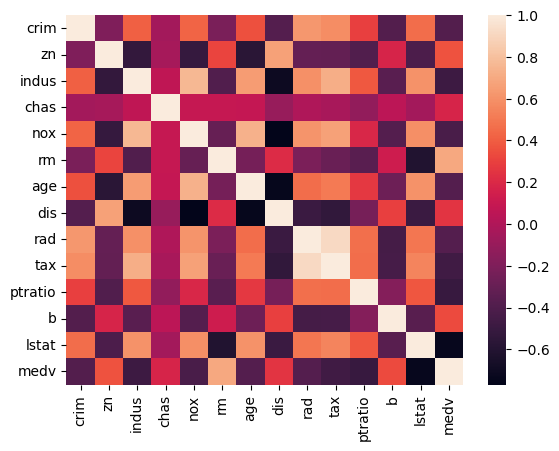

In [5]:
rel=df.corr()
sns.heatmap(rel)
plt.show()

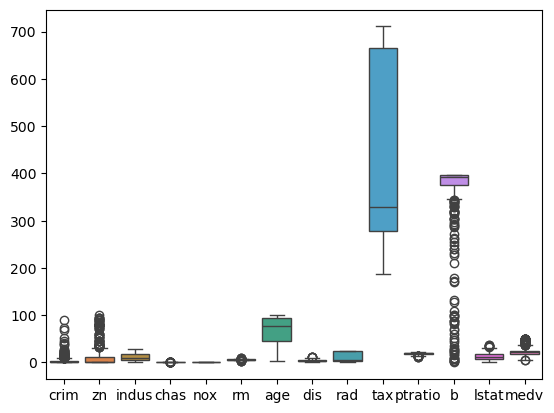

In [6]:
sns.boxplot(data=df)
plt.show()

In [7]:
cols=df.columns
for c in cols :
   sk = df[c].skew().round()
   if sk == 0 or sk == -0 :
          m = df[c].mean()
          s = df[c].std()
          lower = m-3*s
          upper = m+3*s
          df[c] = df[c].map(lambda x : lower if x < lower else upper if x > upper else x )
   else :
          q1 = df[c].quantile(0.25)
          q3 = df[c].quantile(0.75)
          iqr = q3 - q1
          low = q1 - (1.5*iqr)
          up = q3+(1.5*iqr)
          df[c] = df[c].map(lambda x : low if x < low else up if x > up else x)

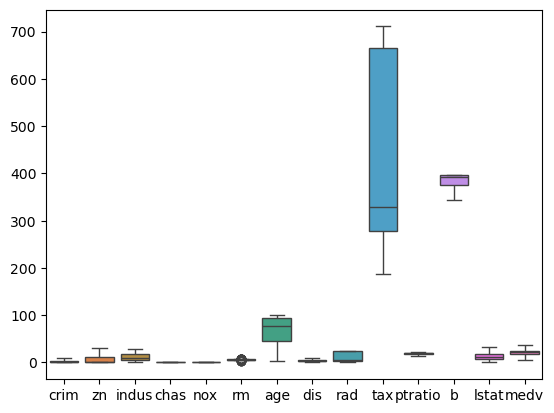

In [8]:
sns.boxplot(data=df)
plt.show()

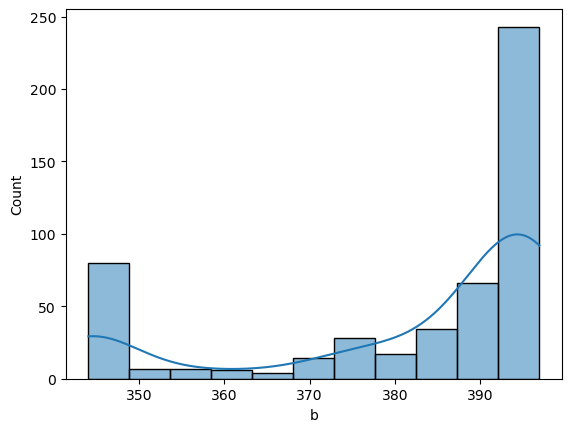

In [9]:
sns.histplot(data=df["b"],kde=True)
plt.show()

Q1=df["b"].quantile(0.25)
Q3=df["b"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df.drop(df[(df["b"]<=lower) | (df["b"]>=upper)].index,inplace=True)
df.info()

In [11]:
#df["b"]=np.log(df["b"]+1)

In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
for i in df.columns:
    df[i]=scale.fit_transform(df[[i]])

In [14]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.670290,0.918420,-1.287909,0.0,-0.144217,0.421834,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.088749,0.279499
1,-0.663949,-0.579471,-0.593381,0.0,-0.740262,0.198153,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.495302,-0.036479
2,-0.663955,-0.579471,-0.593381,0.0,-0.740262,1.307841,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.224272,1.688236
3,-0.662420,-0.579471,-1.306878,0.0,-0.835284,1.036229,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.379766,1.517081
4,-0.651339,-0.579471,-1.306878,0.0,-0.835284,1.252647,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,-1.038819,1.885722
5,-0.663181,-0.579471,-1.306878,0.0,-0.835284,0.211225,-0.351157,1.101820,-0.752922,-1.106115,0.110265,0.640950,-1.055938,0.898290
6,-0.645526,0.460731,-0.476654,0.0,-0.265154,-0.395908,-0.070229,0.859185,-0.523001,-0.577519,-1.523871,0.718697,-0.025965,0.134676
7,-0.628530,0.460731,-0.476654,0.0,-0.265154,-0.163512,0.978808,1.047799,-0.523001,-0.577519,-1.523871,0.786988,0.932680,0.687638
8,-0.608382,0.460731,-0.476654,0.0,-0.265154,-0.949299,1.117494,1.111444,-0.523001,-0.577519,-1.523871,0.247486,2.470507,-0.707933
9,-0.620829,0.460731,-0.476654,0.0,-0.265154,-0.407527,0.616090,1.358092,-0.523001,-0.577519,-1.523871,0.251689,0.640237,-0.391955


In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
x.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.670290,0.918420,-1.287909,0.0,-0.144217,0.421834,-0.120013,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.088749
1,-0.663949,-0.579471,-0.593381,0.0,-0.740262,0.198153,0.367166,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.495302
2,-0.663955,-0.579471,-0.593381,0.0,-0.740262,1.307841,-0.265812,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.224272
3,-0.662420,-0.579471,-1.306878,0.0,-0.835284,1.036229,-0.809889,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.379766
4,-0.651339,-0.579471,-1.306878,0.0,-0.835284,1.252647,-0.511180,1.101820,-0.752922,-1.106115,0.110265,0.786988,-1.038819
5,-0.663181,-0.579471,-1.306878,0.0,-0.835284,0.211225,-0.351157,1.101820,-0.752922,-1.106115,0.110265,0.640950,-1.055938
6,-0.645526,0.460731,-0.476654,0.0,-0.265154,-0.395908,-0.070229,0.859185,-0.523001,-0.577519,-1.523871,0.718697,-0.025965
7,-0.628530,0.460731,-0.476654,0.0,-0.265154,-0.163512,0.978808,1.047799,-0.523001,-0.577519,-1.523871,0.786988,0.932680
8,-0.608382,0.460731,-0.476654,0.0,-0.265154,-0.949299,1.117494,1.111444,-0.523001,-0.577519,-1.523871,0.247486,2.470507
9,-0.620829,0.460731,-0.476654,0.0,-0.265154,-0.407527,0.616090,1.358092,-0.523001,-0.577519,-1.523871,0.251689,0.640237


In [17]:
y.head(10)

0    0.279499
1   -0.036479
2    1.688236
3    1.517081
4    1.885722
5    0.898290
6    0.134676
7    0.687638
8   -0.707933
9   -0.391955
Name: medv, dtype: float64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
multi=LinearRegression()
multi.fit(x_train,y_train)

LinearRegression()

In [19]:
multi.score(x_test,y_test)

0.7289761815379088

In [20]:
y_pred=multi.predict(x_test)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae",mae)
print("r2",round(r2,2))
print("mse",mse)

mae 0.3609181097585628
r2 0.73
mse 0.24260164659153705


In [22]:
y_local=multi.predict(x_train)

In [23]:
maes=mean_absolute_error(y_train,y_local)
r2s=r2_score(y_train,y_local)
mses=mean_squared_error(y_train,y_local)
print("mae",maes)
print("r2",round(r2s,2))
print("mse",mses)

mae 0.34262205579113586
r2 0.8
mse 0.20883248012358036


In [ ]:
from sklearn.navie_bayes import GaussianNB
